【課題】教師なし学習とは何か記述せよ
データを扱う前に、教師なし学習への理解の確認です。以下の観点を含めて文章で記述しましょう。以降の設問も含め、インターネットや書籍で調べても構いません。

- 教師あり学習との比較
- どんなときに使うのか
- 具体的にどんなものがあるのか

- 教師あり学習との比較：データのみを使って、分析をする。教師ありは、データから人間が与えた正解を導き出すための方法を学習する
- どんなときに使うのか：購買記録から顧客を分類して、販売戦略を考える。アンケートなどの文章を分類して、どういった内容のものかを考える。不良品を分類し、工程の管理方法を考える
- 具体的にどんなものがあるか：クラスタリング、主成分分析

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [12]:
data = pd.read_csv("Wholesale customers data.csv")

In [13]:
print("サンプル数:{0} 特徴量：{1}".format(data.shape[0],data.shape[1]))

サンプル数:440 特徴量：8


In [14]:
print("各特徴量の型\n",data.dtypes,"\n")

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 



In [15]:
print("統計量の要約")
display(data.describe())
display(data.head())

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
#この他にもいろいろと見てみましょう
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
data_original = data.copy()
data = data.drop(["Channel","Region"],axis=1)
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


C:\Users\makoto.mizuguchi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


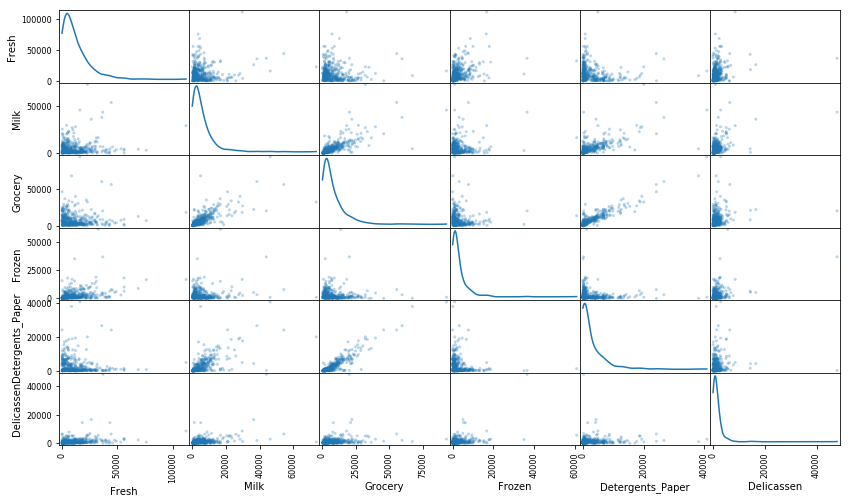

In [23]:
pd.scatter_matrix(data, alpha=0.3, figsize=(14,8),diagonal="kde")
plt.show()

In [24]:
data_fs = np.log(data)

【課題】なぜFeature Scalingが必要なのか記述せよ
Feature Scalingを行う理由とはなんでしょう。文章で記述してください。

scatter matrixがどのように変化したか見るのも良いでしょう。

Feature Scalingは、これを行わないと、各説明変数間の大きさの違いにより、大きい値の方がより被説明変数への影響が大きくなり、小さい値のものが無視されてしまうことになる。一方、Feature Scalingを行うことで、データの大きさが標準化・正規化されるため、そのような数値の大きさによる影響をなくすことができる。
また、これを行う事で、現れる効果としては、例えば、勾配降下法をパラメータ更新の際に採用する場合に確認することができる。具体的には、勾配降下法で各パラメータを更新する場合、大きな値の説明変数の値については更新されるものの、小さな値の説明変数について更新されないという状況が生じることを防ぐことも挙げられる

C:\Users\makoto.mizuguchi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


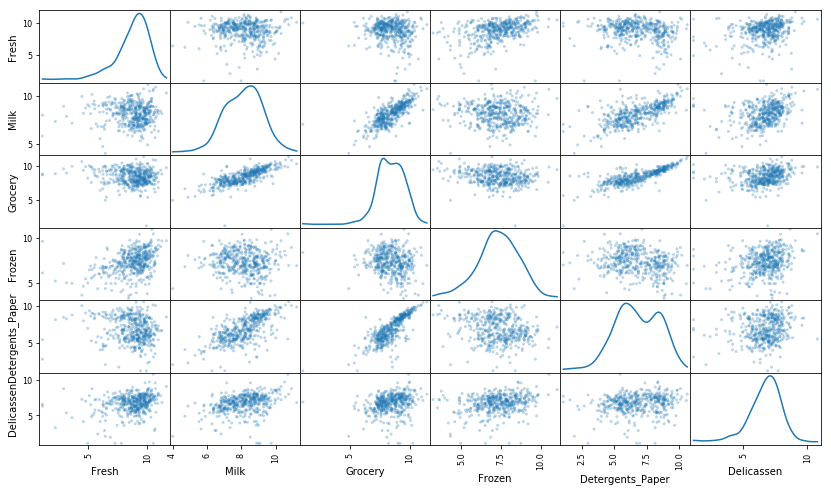

In [33]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

In [29]:
data_pca.shape

(440, 6)

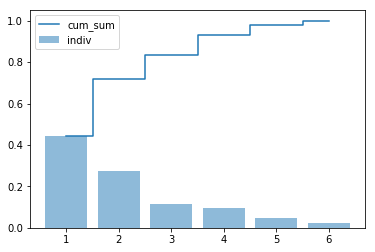

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,7),var_exp, alpha=0.5,align="center",label="indiv")
plt.step(range(1,7),cum_var_exp, where="mid", label="cum_sum")
plt.ylabel = "Explained"
plt.xlabel = "principal components"
plt.legend(loc="best")
plt.show()

In [35]:
#上記から、n_components=2を選択
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_fs)

【課題】なぜPCAを行うのか記述せよ

機械学習の前処理としてなぜPCAが必要なのかについて記述してください。

PCAを行うことで、特徴量を減らすことができ、それは次元の呪いを防ぐことができる。また、計算時間を減らす事もできるため。

【課題】クラスタリングとは何か記述せよ

クラスタリングについての説明を記述してください。その際、以下の観点を含めてください。

- いつ何に使うのか
- 階層的手法と非階層的手法との違い
- クラス分類（classification）との比較

クラスタリングとは、データを自然なまとまりに分けることをいう。
- いつ何に使うか？：データが入手でき、それをグルーピング化して、データを理解する際に使用する手法である。
- 階層的手法と非階層的手法の違い：階層的手法とは、赤らじめクラスタの数を指定することなく、樹形図を各ことで、適切なクラスタの数を決定する方法である。一方、非階層的手法は、KMeansに代表されるように、あらかじめ適切なクラスタ数を決めて、クラスタリングする手法をいう。
- クラス分類との違いは、クラスタリングが教師なし学習であることに対して、クラス分類は教師あり学習である点


In [37]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

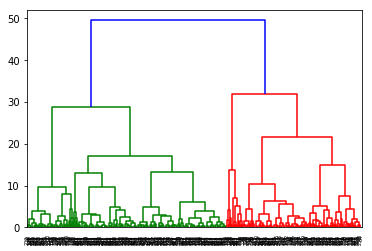

In [41]:
row_clusters = linkage(pdist(data_pca,metric="euclidean"),method="ward")
row_render = dendrogram(row_clusters)
plt.show()

【課題】k-meansにおけるkの値の検討

クラスタリングはk-meansが定石です。まずはクラスタ数kの値を検討します。

まずはそのためのコードを記述し、その後選んだkの値と、それに決めた理由を記述してください。

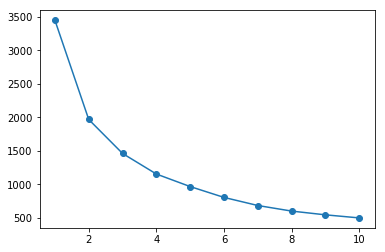

In [46]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init="random",n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(data_pca)
    SSE.append(km.inertia_)
    
plt.plot(range(1,11), SSE, marker="o")
#plt.xlabel("k")
#plt.ylabel("SSE")
plt.show()
     

- k=2
- k=2の箇所で、折れ線が形成されているため

In [74]:
km = KMeans(n_clusters=2,init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)

In [75]:
y_km.shape

(440,)

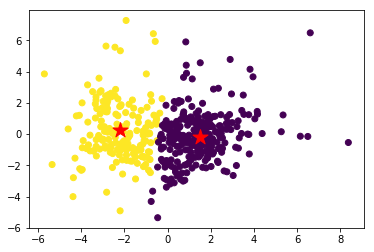

In [92]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=y_km,marker="o")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker="*",s=250)

In [85]:
print(km.cluster_centers_)

[[ 1.49702975 -0.16548419]
 [-2.22440014  0.24588894]]


【課題】既知のグループとの比較

ChannelとRegionというグループ分けが元々存在していました。今回作ったクラスタと、それらとを比較してみましょう。

比較に使ったコードと、どのような結果だったかの説明を記述してください。

In [110]:
df_y_km = pd.DataFrame(y_km, columns=["KM"])

df = pd.concat([df_y_km,data_original[["Channel","Region"]]],axis=1)
df.head()

,KM,Channel,Region
0,1,2,3
1,1,2,3
2,1,2,3
3,0,1,3
4,1,2,3


In [149]:
df[~df.duplicated()]

,KM,Channel,Region
0,1,2,3
3,0,1,3
8,1,1,3
11,0,2,3
196,0,1,1
197,1,2,1
208,1,1,1
223,0,2,1
293,1,2,2
294,0,1,2


In [147]:
for a,b,c in df[~df.duplicated()].values:
    print(df[(df.KM==a) & (df.Channel==b) & (df.Region==c)].count())

KM         101
Channel    101
Region     101
dtype: int64
KM         181
Channel    181
Region     181
dtype: int64
KM         30
Channel    30
Region     30
dtype: int64
KM         4
Channel    4
Region     4
dtype: int64
KM         48
Channel    48
Region     48
dtype: int64
KM         16
Channel    16
Region     16
dtype: int64
KM         11
Channel    11
Region     11
dtype: int64
KM         2
Channel    2
Region     2
dtype: int64
KM         18
Channel    18
Region     18
dtype: int64
KM         27
Channel    27
Region     27
dtype: int64
KM         1
Channel    1
Region     1
dtype: int64
KM         1
Channel    1
Region     1
dtype: int64


In [148]:
(df[(df.KM==1) & (df.Channel==2) & (df.Region==3)].count()+df[(df.KM==0) & (df.Channel==1) & (df.Region==3)].count())/df.count()

KM         0.640909
Channel    0.640909
Region     0.640909
dtype: float64

上記から、以下の2つで64%のカウントがなされることになるため、3つの説明変数をすべて捉えた大方の分類についてはできていると考える(精度はそこそこ出ている)。

In [157]:
print("3つの説明変数の上位2件は以下の通り：")
print(df[~df.duplicated()].iloc[:2])

3つの説明変数の上位2件は以下の通り：
   KM  Channel  Region
0   1        2       3
3   0        1       3


【課題】クラスタの説明

それぞれのクラスタはどういったものなのか説明を記述してください。

クラスタリングについては詳しくない卸売業者の経営陣に説明するような平易な書き方を心がけてください。

KMeansで１となったものは、Retailは小売店でミルクを購入したその他の地域に住む顧客層。0となったものはHotel/Restaurant/Caféでミルクを買ったその他の地域に住む顧客層を表す。